In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Load the cleaned dataset.

In [2]:
df = pd.read_csv("../02-data/mlcasestudy_cleaned.csv")

In [3]:
df.head()

,loan_id,loan_issue_date,loan_amount,amount_outstanding_14d,amount_outstanding_21d,card_expiry_month,card_expiry_year,existing_klarna_debt,num_active_loans,days_since_first_loan,...,num_failed_payments_6m,num_failed_payments_1y,amount_repaid_14d,amount_repaid_1m,amount_repaid_3m,amount_repaid_6m,amount_repaid_1y,merchant_group,merchant_category,default
0,a55cf3062bd45a83766096fd0c4697d6,2023-06-24,5300,0,0,2.0,2026.0,21098.0,2,717,...,0,0,6875,15580,42325,67878,152193,Clothing & Shoes,Adult Shoes & Clothing,0
1,45e3d15cb313d767470722e952e14313,2023-09-22,9547,7161,7161,6.0,2027.0,0.0,0,-1,...,0,0,0,0,0,0,0,"Leisure, Sport & Hobby",Concept Stores & Miscellaneous,1
2,b195c127c7605b7b936b90bcdb5e889c,2023-07-03,5948,0,0,12.0,2023.0,0.0,0,-1,...,0,0,0,0,0,0,0,Clothing & Shoes,General Shoes & Clothing,0
3,36028b1dbeb4aeef565a79ca9700667a,2023-08-19,15871,11904,0,2.0,2026.0,31742.0,1,0,...,0,0,0,0,0,0,0,Clothing & Shoes,Youthful Shoes & Clothing,0
4,5317f8e22a8f790b6e11a0f12320422d,2023-09-30,19510,0,0,8.0,2026.0,9064.0,1,501,...,0,0,6511,14000,32289,61993,116532,"Leisure, Sport & Hobby",Sports Gear & Outdoor,0


# Remove the columns to avoid data leakage.

In [5]:
#df = df.drop(columns=['amount_outstanding_14d', "amount_outstanding_21d"]) 
df.head()

,loan_id,loan_issue_date,loan_amount,amount_outstanding_14d,amount_outstanding_21d,card_expiry_month,card_expiry_year,existing_klarna_debt,num_active_loans,days_since_first_loan,...,num_failed_payments_6m,num_failed_payments_1y,amount_repaid_14d,amount_repaid_1m,amount_repaid_3m,amount_repaid_6m,amount_repaid_1y,merchant_group,merchant_category,default
0,a55cf3062bd45a83766096fd0c4697d6,2023-06-24,5300,0,0,2.0,2026.0,21098.0,2,717,...,0,0,6875,15580,42325,67878,152193,Clothing & Shoes,Adult Shoes & Clothing,0
1,45e3d15cb313d767470722e952e14313,2023-09-22,9547,7161,7161,6.0,2027.0,0.0,0,-1,...,0,0,0,0,0,0,0,"Leisure, Sport & Hobby",Concept Stores & Miscellaneous,1
2,b195c127c7605b7b936b90bcdb5e889c,2023-07-03,5948,0,0,12.0,2023.0,0.0,0,-1,...,0,0,0,0,0,0,0,Clothing & Shoes,General Shoes & Clothing,0
3,36028b1dbeb4aeef565a79ca9700667a,2023-08-19,15871,11904,0,2.0,2026.0,31742.0,1,0,...,0,0,0,0,0,0,0,Clothing & Shoes,Youthful Shoes & Clothing,0
4,5317f8e22a8f790b6e11a0f12320422d,2023-09-30,19510,0,0,8.0,2026.0,9064.0,1,501,...,0,0,6511,14000,32289,61993,116532,"Leisure, Sport & Hobby",Sports Gear & Outdoor,0


In [6]:
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
other_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

## Change card expiry year to number of days until expiry

And drop year and month from the columns

In [7]:
# card_expiry_month, card_expiry_year
# Current date
today = pd.Timestamp.today()

# Create a datetime column for expiration date (use last day of the month)
df['expiration_date'] = pd.to_datetime(
    df['card_expiry_year'].astype(int).astype(str) + '-' + df['card_expiry_month'].astype(int).astype(str) + '-01'
) #+ pd.offsets.MonthEnd(0)  # move to end of that month

# Compute days until expiration
df['days_until_expiration'] = (df['expiration_date'] - pd.to_datetime(df['loan_issue_date'])).dt.days

df.head()


,loan_id,loan_issue_date,loan_amount,amount_outstanding_14d,amount_outstanding_21d,card_expiry_month,card_expiry_year,existing_klarna_debt,num_active_loans,days_since_first_loan,...,amount_repaid_14d,amount_repaid_1m,amount_repaid_3m,amount_repaid_6m,amount_repaid_1y,merchant_group,merchant_category,default,expiration_date,days_until_expiration
0,a55cf3062bd45a83766096fd0c4697d6,2023-06-24,5300,0,0,2.0,2026.0,21098.0,2,717,...,6875,15580,42325,67878,152193,Clothing & Shoes,Adult Shoes & Clothing,0,2026-02-01,953
1,45e3d15cb313d767470722e952e14313,2023-09-22,9547,7161,7161,6.0,2027.0,0.0,0,-1,...,0,0,0,0,0,"Leisure, Sport & Hobby",Concept Stores & Miscellaneous,1,2027-06-01,1348
2,b195c127c7605b7b936b90bcdb5e889c,2023-07-03,5948,0,0,12.0,2023.0,0.0,0,-1,...,0,0,0,0,0,Clothing & Shoes,General Shoes & Clothing,0,2023-12-01,151
3,36028b1dbeb4aeef565a79ca9700667a,2023-08-19,15871,11904,0,2.0,2026.0,31742.0,1,0,...,0,0,0,0,0,Clothing & Shoes,Youthful Shoes & Clothing,0,2026-02-01,897
4,5317f8e22a8f790b6e11a0f12320422d,2023-09-30,19510,0,0,8.0,2026.0,9064.0,1,501,...,6511,14000,32289,61993,116532,"Leisure, Sport & Hobby",Sports Gear & Outdoor,0,2026-08-01,1036


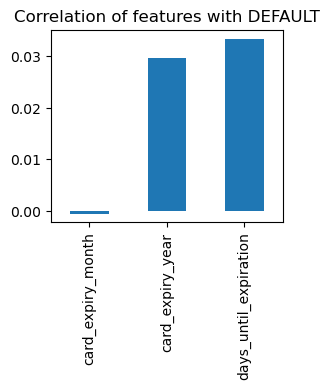

In [8]:
corrs = df[["card_expiry_month", "card_expiry_year", "days_until_expiration", "default"]].corrwith(df["default"])

corrs.drop("default").sort_values().plot(kind="bar", figsize=(3,2.5))
plt.title(f"Correlation of features with DEFAULT")
plt.show()


Little improvement, but I'll still use days until expiration as a feature instead of year. The newer the card is the more likely is to have default. Meaning that the customers are more likely to get a new card to get a new loan.

In [9]:
df = df.drop(columns=["card_expiry_month", "card_expiry_year", "expiration_date"]) 
df.head()

,loan_id,loan_issue_date,loan_amount,amount_outstanding_14d,amount_outstanding_21d,existing_klarna_debt,num_active_loans,days_since_first_loan,new_exposure_7d,new_exposure_14d,...,num_failed_payments_1y,amount_repaid_14d,amount_repaid_1m,amount_repaid_3m,amount_repaid_6m,amount_repaid_1y,merchant_group,merchant_category,default,days_until_expiration
0,a55cf3062bd45a83766096fd0c4697d6,2023-06-24,5300,0,0,21098.0,2,717,0,0,...,0,6875,15580,42325,67878,152193,Clothing & Shoes,Adult Shoes & Clothing,0,953
1,45e3d15cb313d767470722e952e14313,2023-09-22,9547,7161,7161,0.0,0,-1,0,0,...,0,0,0,0,0,0,"Leisure, Sport & Hobby",Concept Stores & Miscellaneous,1,1348
2,b195c127c7605b7b936b90bcdb5e889c,2023-07-03,5948,0,0,0.0,0,-1,0,0,...,0,0,0,0,0,0,Clothing & Shoes,General Shoes & Clothing,0,151
3,36028b1dbeb4aeef565a79ca9700667a,2023-08-19,15871,11904,0,31742.0,1,0,15871,15871,...,0,0,0,0,0,0,Clothing & Shoes,Youthful Shoes & Clothing,0,897
4,5317f8e22a8f790b6e11a0f12320422d,2023-09-30,19510,0,0,9064.0,1,501,0,8586,...,0,6511,14000,32289,61993,116532,"Leisure, Sport & Hobby",Sports Gear & Outdoor,0,1036


# Change issue date of loan to days since the earliest date in the dataset

In [10]:
df.loan_issue_date[0]

'2023-06-24'

In [11]:
df["loan_issue_date"]  = pd.to_datetime(df.loan_issue_date, format="%Y-%m-%d")
df["loan_issue_date_numeric"] = (df['loan_issue_date'] - df['loan_issue_date'].min()).dt.days
df = df.drop(columns="loan_issue_date")
df.head()

,loan_id,loan_amount,amount_outstanding_14d,amount_outstanding_21d,existing_klarna_debt,num_active_loans,days_since_first_loan,new_exposure_7d,new_exposure_14d,num_confirmed_payments_3m,...,amount_repaid_14d,amount_repaid_1m,amount_repaid_3m,amount_repaid_6m,amount_repaid_1y,merchant_group,merchant_category,default,days_until_expiration,loan_issue_date_numeric
0,a55cf3062bd45a83766096fd0c4697d6,5300,0,0,21098.0,2,717,0,0,20,...,6875,15580,42325,67878,152193,Clothing & Shoes,Adult Shoes & Clothing,0,953,23
1,45e3d15cb313d767470722e952e14313,9547,7161,7161,0.0,0,-1,0,0,0,...,0,0,0,0,0,"Leisure, Sport & Hobby",Concept Stores & Miscellaneous,1,1348,113
2,b195c127c7605b7b936b90bcdb5e889c,5948,0,0,0.0,0,-1,0,0,0,...,0,0,0,0,0,Clothing & Shoes,General Shoes & Clothing,0,151,32
3,36028b1dbeb4aeef565a79ca9700667a,15871,11904,0,31742.0,1,0,15871,15871,0,...,0,0,0,0,0,Clothing & Shoes,Youthful Shoes & Clothing,0,897,79
4,5317f8e22a8f790b6e11a0f12320422d,19510,0,0,9064.0,1,501,0,8586,14,...,6511,14000,32289,61993,116532,"Leisure, Sport & Hobby",Sports Gear & Outdoor,0,1036,121


# Debt to loan ratio

In [12]:
df['debt_to_loan_ratio'] = df['existing_klarna_debt'] / (df['loan_amount'])  # +1 to avoid division by zero
df.head()

,loan_id,loan_amount,amount_outstanding_14d,amount_outstanding_21d,existing_klarna_debt,num_active_loans,days_since_first_loan,new_exposure_7d,new_exposure_14d,num_confirmed_payments_3m,...,amount_repaid_1m,amount_repaid_3m,amount_repaid_6m,amount_repaid_1y,merchant_group,merchant_category,default,days_until_expiration,loan_issue_date_numeric,debt_to_loan_ratio
0,a55cf3062bd45a83766096fd0c4697d6,5300,0,0,21098.0,2,717,0,0,20,...,15580,42325,67878,152193,Clothing & Shoes,Adult Shoes & Clothing,0,953,23,3.980755
1,45e3d15cb313d767470722e952e14313,9547,7161,7161,0.0,0,-1,0,0,0,...,0,0,0,0,"Leisure, Sport & Hobby",Concept Stores & Miscellaneous,1,1348,113,0.000000
2,b195c127c7605b7b936b90bcdb5e889c,5948,0,0,0.0,0,-1,0,0,0,...,0,0,0,0,Clothing & Shoes,General Shoes & Clothing,0,151,32,0.000000
3,36028b1dbeb4aeef565a79ca9700667a,15871,11904,0,31742.0,1,0,15871,15871,0,...,0,0,0,0,Clothing & Shoes,Youthful Shoes & Clothing,0,897,79,2.000000
4,5317f8e22a8f790b6e11a0f12320422d,19510,0,0,9064.0,1,501,0,8586,14,...,14000,32289,61993,116532,"Leisure, Sport & Hobby",Sports Gear & Outdoor,0,1036,121,0.464582


In [13]:
corrs = df[["debt_to_loan_ratio", "existing_klarna_debt", "loan_amount", "default"]].corrwith(df["default"])

corrs.drop("default").sort_values()#.plot(kind="bar", figsize=(3,2.5))
#plt.title(f"Correlation of features with Default")
#plt.show()


existing_klarna_debt   -0.018998
debt_to_loan_ratio     -0.018579
loan_amount             0.009593
dtype: float64

In [14]:
#df = df.drop(columns=["debt_to_loan_ratio"])

The correlation of debt_to_loan_ratio with default is slightly smaller than that of existing_klarna_debt (in absolute value) but larger that loan_amount alone.
It seems that this feature wouldn't be useful.

# Encode the categorical features group.
Could do the same for category, but I haven't explored this yet.
I'll do this in the next step when preparing the data for training.

# Ratio failed to successful payments in last 3 and 6 months

In [15]:
df["ratio_failed_3m"] = df["num_failed_payments_3m"] / (df["num_confirmed_payments_3m"]+df["num_failed_payments_3m"] )
df["ratio_failed_6m"] = df["num_failed_payments_6m"] / (df["num_confirmed_payments_6m"]+df["num_failed_payments_6m"] )

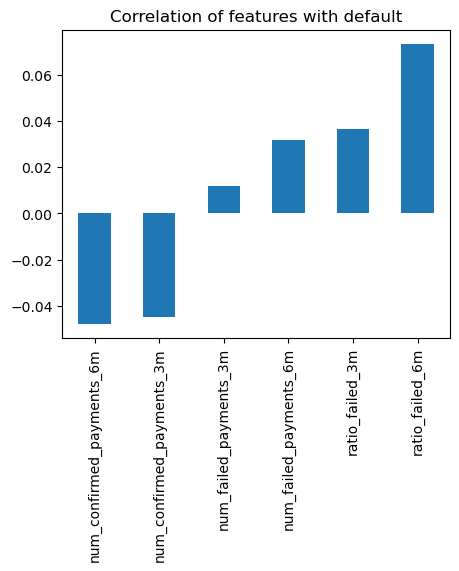

In [16]:
corrs = df[["ratio_failed_3m","ratio_failed_6m","num_failed_payments_3m","num_confirmed_payments_3m","num_failed_payments_6m","num_confirmed_payments_6m","default"]].corrwith(df["default"])
#print(corrs.sort_values(ascending=False))

corrs.drop("default").sort_values().plot(kind="bar", figsize=(5,4))
plt.title(f"Correlation of features with default")
plt.show()


In [17]:
df.isnull().sum()[df.isnull().sum()>0]

ratio_failed_3m    57522
ratio_failed_6m    51153
dtype: int64

In [18]:
#df.fillna({"ratio_failed_3m": 1, "ratio_failed_6m": 1}, inplace=True)
df['ratio_failed_3m'].fillna(df['ratio_failed_3m'].mean(), inplace=True)
df['ratio_failed_6m'].fillna(df['ratio_failed_6m'].mean(), inplace=True)

df.head()

/var/folders/8v/xpvjr2rd5h37bdb655bsyz1r0000gp/T/ipykernel_1471/90030264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ratio_failed_3m'].fillna(df['ratio_failed_3m'].mean(), inplace=True)
/var/folders/8v/xpvjr2rd5h37bdb655bsyz1r0000gp/T/ipykernel_1471/90030264.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

,loan_id,loan_amount,amount_outstanding_14d,amount_outstanding_21d,existing_klarna_debt,num_active_loans,days_since_first_loan,new_exposure_7d,new_exposure_14d,num_confirmed_payments_3m,...,amount_repaid_6m,amount_repaid_1y,merchant_group,merchant_category,default,days_until_expiration,loan_issue_date_numeric,debt_to_loan_ratio,ratio_failed_3m,ratio_failed_6m
0,a55cf3062bd45a83766096fd0c4697d6,5300,0,0,21098.0,2,717,0,0,20,...,67878,152193,Clothing & Shoes,Adult Shoes & Clothing,0,953,23,3.980755,0.000000,0.000000
1,45e3d15cb313d767470722e952e14313,9547,7161,7161,0.0,0,-1,0,0,0,...,0,0,"Leisure, Sport & Hobby",Concept Stores & Miscellaneous,1,1348,113,0.000000,0.005874,0.012119
2,b195c127c7605b7b936b90bcdb5e889c,5948,0,0,0.0,0,-1,0,0,0,...,0,0,Clothing & Shoes,General Shoes & Clothing,0,151,32,0.000000,0.005874,0.012119
3,36028b1dbeb4aeef565a79ca9700667a,15871,11904,0,31742.0,1,0,15871,15871,0,...,0,0,Clothing & Shoes,Youthful Shoes & Clothing,0,897,79,2.000000,0.005874,0.012119
4,5317f8e22a8f790b6e11a0f12320422d,19510,0,0,9064.0,1,501,0,8586,14,...,61993,116532,"Leisure, Sport & Hobby",Sports Gear & Outdoor,0,1036,121,0.464582,0.000000,0.000000


In [19]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

## Recent repayment to loan ratio

In [20]:
#df['repayment_capacity'] = df['amount_repaid_1m'] / (df['loan_amount'] + 1)
#df['exposure_trend'] = df['new_exposure_7d'] - df['new_exposure_14d']

In [21]:
"""
corrs = df[["loan_amount", "amount_repaid_1m", "new_exposure_7d", "new_exposure_14d", 
            "repayment_capacity", "exposure_trend", "default"]].corrwith(df["default"])
# take absolute values of correlation and sort them
corrs.drop("default").sort_values()
"""

'\ncorrs = df[["loan_amount", "amount_repaid_1m", "new_exposure_7d", "new_exposure_14d", \n            "repayment_capacity", "exposure_trend", "default"]].corrwith(df["default"])\n# take absolute values of correlation and sort them\ncorrs.drop("default").sort_values()\n'

In [22]:
"""
df[["loan_amount", "amount_repaid_1m", "new_exposure_7d", "new_exposure_14d", 
            "repayment_capacity", "exposure_trend", "default"]].describe()
            """

'\ndf[["loan_amount", "amount_repaid_1m", "new_exposure_7d", "new_exposure_14d", \n            "repayment_capacity", "exposure_trend", "default"]].describe()\n            '

## High risk customer

In [23]:
df['high_risk_customer'] = ((df['num_active_loans'] >= 3) & # 3 is set arbitrarily, more studies needed to set something meaningful
                            (df['existing_klarna_debt'] > df['existing_klarna_debt'].median())
                            ).astype(int)

In [24]:
df['is_new_customer'] = (df['days_since_first_loan'] <= 5).astype(int)

<Axes: >

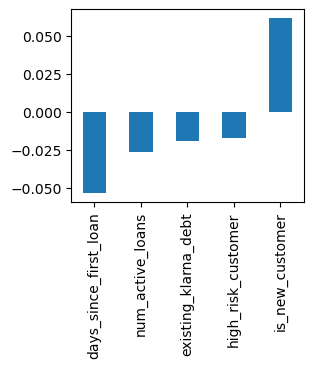

In [25]:
corrs = df[["high_risk_customer", "num_active_loans", "existing_klarna_debt", "default", 
            "is_new_customer", "days_since_first_loan"]].corrwith(df["default"])
# take absolute values of correlation and sort them
corrs.drop("default").sort_values().plot(kind="bar", figsize=(3,2.5))

In [26]:
"""
# High risk customer (multiple active loans + existing debt)
if 'num_active_loans' in self.df.columns and 'existing_klarna_debt' in self.df.columns:
    self.df['high_risk_customer'] = (
        (self.df['num_active_loans'] >= 3) & 
        (self.df['existing_klarna_debt'] > self.df['existing_klarna_debt'].median())
    ).astype(int)
    risk_features.append('high_risk_customer')

# New customer (based on days since first loan)
if 'days_since_first_loan' in self.df.columns:
    self.df['is_new_customer'] = (self.df['days_since_first_loan'] <= 30).astype(int)
    risk_features.append('is_new_customer')
"""


"\n# High risk customer (multiple active loans + existing debt)\nif 'num_active_loans' in self.df.columns and 'existing_klarna_debt' in self.df.columns:\n    self.df['high_risk_customer'] = (\n        (self.df['num_active_loans'] >= 3) & \n        (self.df['existing_klarna_debt'] > self.df['existing_klarna_debt'].median())\n    ).astype(int)\n    risk_features.append('high_risk_customer')\n\n# New customer (based on days since first loan)\nif 'days_since_first_loan' in self.df.columns:\n    self.df['is_new_customer'] = (self.df['days_since_first_loan'] <= 30).astype(int)\n    risk_features.append('is_new_customer')\n"

# Check data leakage

In [27]:
quality_issues = []

#if 'amount_outstanding_21d' in df.columns and 'default' in df.columns:
leakage_check = (df['amount_outstanding_21d'] > 0) == (df['default'] == 1)
if not leakage_check.all():
    quality_issues.append("Data leakage: outstanding_21d inconsistent with default definition")
    print("⚠️  Warning: Outstanding amounts at 21d inconsistent with default definition")
else:
    print("✅ No data leakage detected in target definition")

✅ No data leakage detected in target definition


In [ ]:
# Check if amount_outstanding_21d <= amount_outstanding_14d (logical consistency)
#if 'amount_outstanding_14d' in df.columns and 'amount_outstanding_21d' in df.columns:
logical_inconsistency = df['amount_outstanding_21d'] > df['amount_outstanding_14d']
if logical_inconsistency.any():
    n_inconsistent = logical_inconsistency.sum()
    quality_issues.append(f"{n_inconsistent} loans have outstanding_21d > outstanding_14d")
    print(f"⚠️  Warning: {n_inconsistent} loans have more outstanding at 21d than 14d")
else:
    print("✅ Outstanding amounts are logically consistent")

✅ Outstanding amounts are logically consistent


# Other features to consider

In [31]:
# How much they typically repay over different periods (spending/repayment velocity)
#df['avg_daily_repayment_14d'] = df['amount_repaid_14d'] / 14
#df['avg_daily_repayment_1m'] = df['amount_repaid_1m'] / 30
#df['avg_daily_repayment_3m'] = df['amount_repaid_3m'] / 90
#df['avg_daily_repayment_6m'] = df['amount_repaid_6m'] / 180
#df['avg_daily_repayment_1y'] = df['amount_repaid_1y'] / 365

"""
# Repayment trend - are they paying more or less over time?
df['repayment_trend_recent'] = df['amount_repaid_14d'] / 14 - df['amount_repaid_1m'] / 30
df['repayment_trend_medium'] = df['amount_repaid_3m'] / 90 - df['amount_repaid_6m'] / 180
df['repayment_trend_long'] = df['amount_repaid_6m'] / 180 - df['amount_repaid_1y'] / 365
"""

"\n# Repayment trend - are they paying more or less over time?\ndf['repayment_trend_recent'] = df['amount_repaid_14d'] / 14 - df['amount_repaid_1m'] / 30\ndf['repayment_trend_medium'] = df['amount_repaid_3m'] / 90 - df['amount_repaid_6m'] / 180\ndf['repayment_trend_long'] = df['amount_repaid_6m'] / 180 - df['amount_repaid_1y'] / 365\n"

In [ ]:
"""
new_features_repaid = ["avg_daily_repayment_14d", "avg_daily_repayment_1m", "avg_daily_repayment_3m",
                       "avg_daily_repayment_6m", "avg_daily_repayment_1y",
                       "repayment_trend_recent", "repayment_trend_medium", "repayment_trend_long",
                       "amount_repaid_14d", "amount_repaid_1m", "amount_repaid_3m", "amount_repaid_6m", "amount_repaid_1y"
]

corrs = df[new_features_repaid + ["default"]].corrwith(df["default"])
corrs.drop("default").sort_values().plot(kind="bar", figsize=(5,4))
"""

'\nnew_features_repaid = ["avg_daily_repayment_14d", "avg_daily_repayment_1m", "avg_daily_repayment_3m",\n                       "avg_daily_repayment_6m", "avg_daily_repayment_1y",\n                       "repayment_trend_recent", "repayment_trend_medium", "repayment_trend_long",\n                       "amount_repaid_14d", "amount_repaid_1m", "amount_repaid_3m", "amount_repaid_6m", "amount_repaid_1y"\n]\n\ncorrs = df[new_features_repaid + ["default"]].corrwith(df["default"])\ncorrs.drop("default").sort_values().plot(kind="bar", figsize=(5,4))\n'

### Loan affordability 

In [33]:
"""
# Can they afford this loan based on historical repayment capacity?
df['loan_to_monthly_repayment'] = df['loan_amount'] / (df['amount_repaid_1m'] + 1)
df['loan_to_quarterly_repayment'] = df['loan_amount'] / (df['amount_repaid_3m'] + 1)
df['loan_to_yearly_repayment'] = df['loan_amount'] / (df['amount_repaid_1y'] + 1)

# How many months of typical repayment would this loan require?
df['months_of_repayment_needed'] = df['loan_amount'] / (df['amount_repaid_1m'] / 1 + 1)

# Aggressive borrowing flag
df['oversized_loan'] = (df['loan_amount'] > df['amount_repaid_3m'] * 2).astype(int)
df['extreme_loan'] = (df['loan_amount'] > df['amount_repaid_6m']).astype(int)
"""

"\n# Can they afford this loan based on historical repayment capacity?\ndf['loan_to_monthly_repayment'] = df['loan_amount'] / (df['amount_repaid_1m'] + 1)\ndf['loan_to_quarterly_repayment'] = df['loan_amount'] / (df['amount_repaid_3m'] + 1)\ndf['loan_to_yearly_repayment'] = df['loan_amount'] / (df['amount_repaid_1y'] + 1)\n\n# How many months of typical repayment would this loan require?\ndf['months_of_repayment_needed'] = df['loan_amount'] / (df['amount_repaid_1m'] / 1 + 1)\n\n# Aggressive borrowing flag\ndf['oversized_loan'] = (df['loan_amount'] > df['amount_repaid_3m'] * 2).astype(int)\ndf['extreme_loan'] = (df['loan_amount'] > df['amount_repaid_6m']).astype(int)\n"

# Remove amount_outstanding_14d and amount_outstanding_21d
They are features not known at the moment of loan issue.

In [34]:
df = df.drop(columns=["amount_outstanding_14d", "amount_outstanding_21d"])

numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
other_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()


# Check new correlations

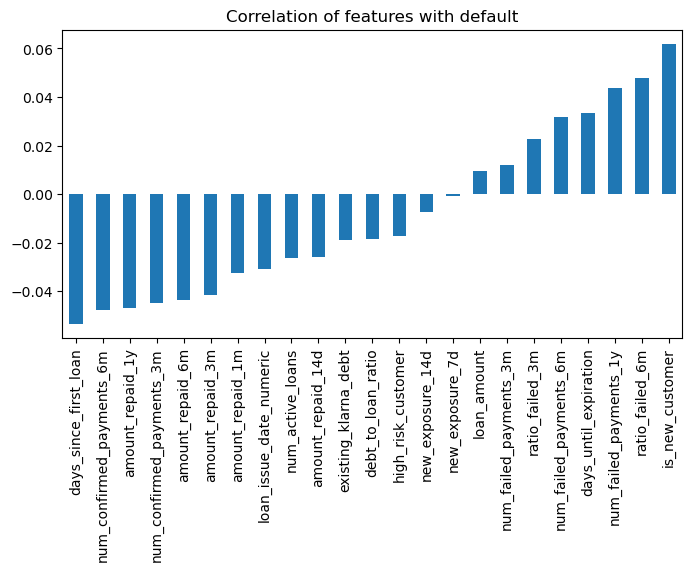

In [35]:
corrs = df[numeric_cols].corrwith(df["default"])

corrs.drop("default").sort_values().plot(kind="bar", figsize=(8,4))
plt.title(f"Correlation of features with default")
plt.show()


In [37]:
keep_features = ['loan_id', 'loan_amount', 'existing_klarna_debt', 'num_active_loans',
       'days_since_first_loan','days_until_expiration', 'ratio_failed_3m', 'ratio_failed_6m',
       'merchant_group', 'merchant_category', 'default'
]

discard = ["debt_to_loan_ratio", "num_failed_payments_3m", "num_confirmed_payments_6m",
           "high_risk_customer", "new_exposure_7d"]

# Additional notes

Other feature engineering ideas:
- Calulated, but need to deal with NaNs:
    - ratio between num_failed_payments_3m and num_confirmed_payments_3m + num_failed_payments_3m
    - ratio between num_failed_payments_6m and num_confirmed_payments_6m + num_failed_payments_6m
- Think of how to use amout_repaied_xx



# Save new dataset

In [38]:
#df.columns

In [39]:
#df = df.drop(columns=["ratio_failed_6m", "ratio_failed_3m"])
df = df[keep_features]
df.to_csv("../02-data/mlcasestudy_to_train.csv", index=False)